In [95]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [96]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo (1).csv


In [97]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [99]:
data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [100]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [101]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [102]:
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [103]:
data.shape

(101, 18)

In [104]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

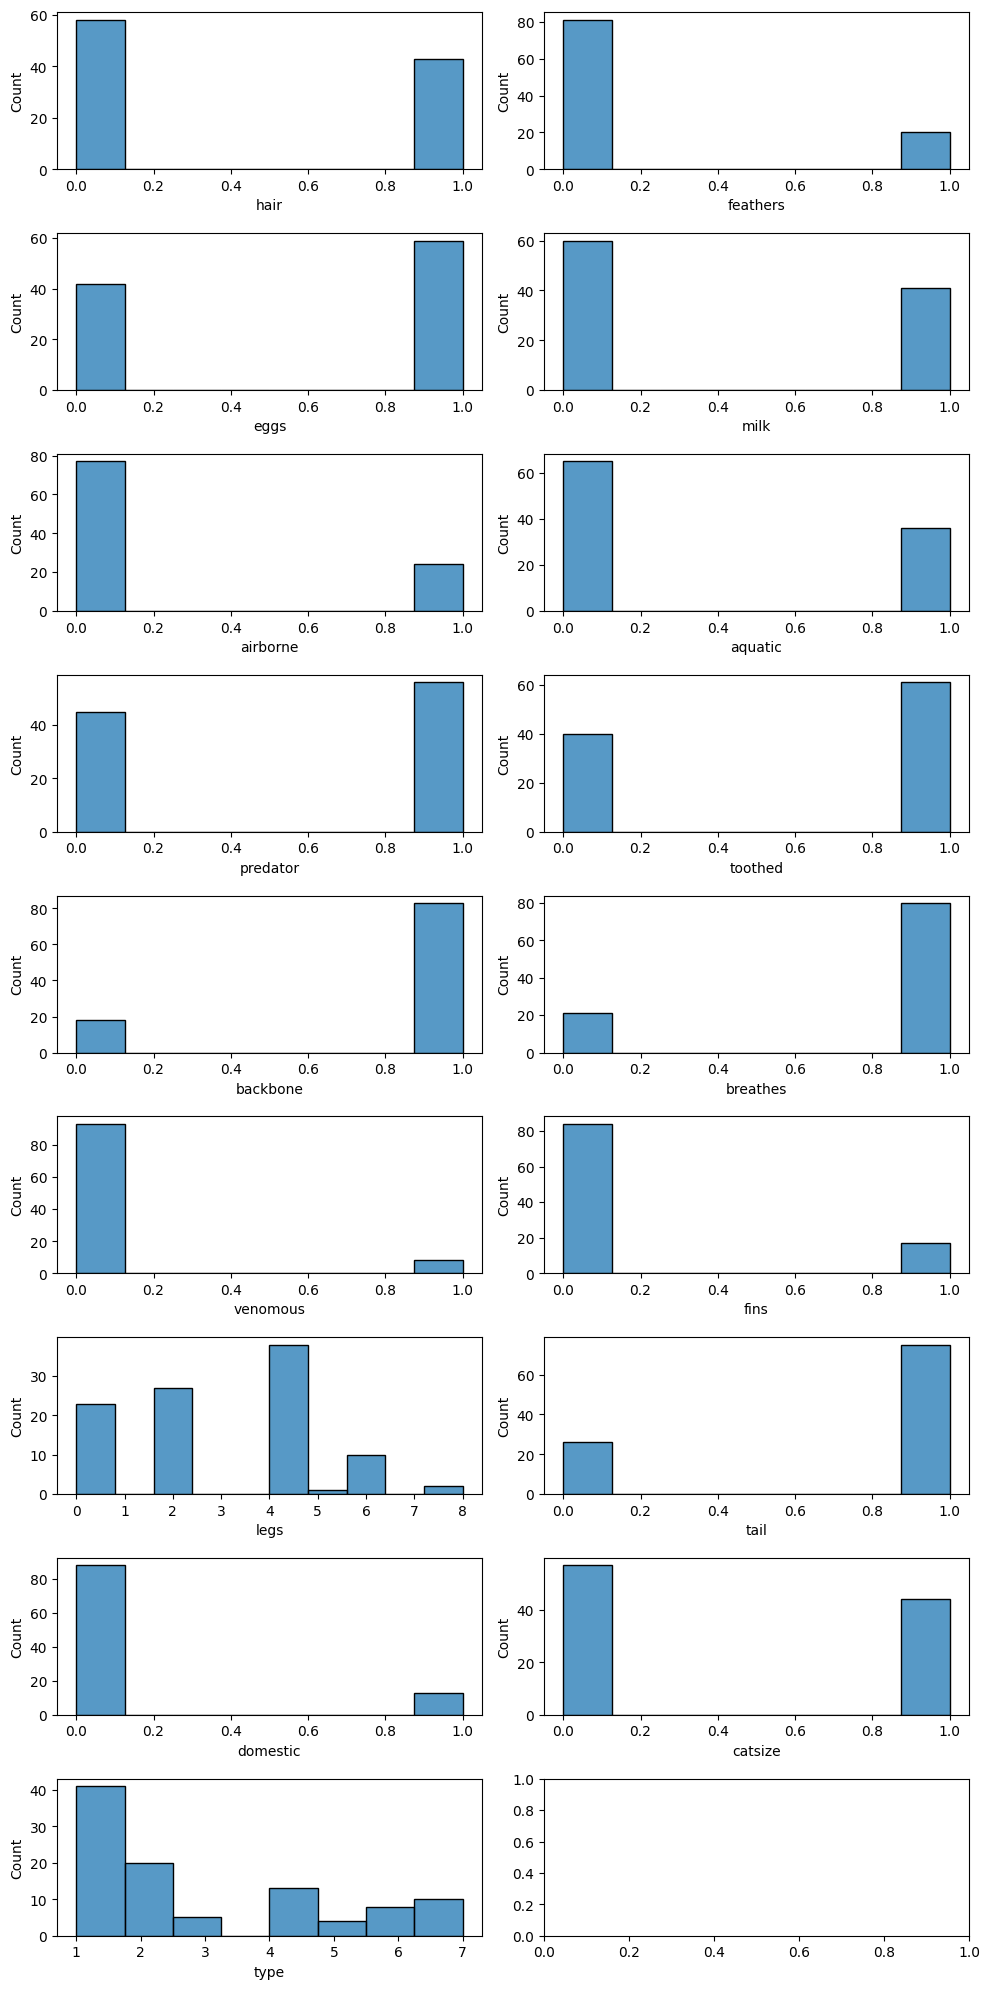

In [105]:
# PLOTTING HISTOGRAM ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(9, 2, figsize=(10, 20))

sns.histplot(data['hair'], ax = ax[0,0])
sns.histplot(data['feathers'], ax = ax[0,1])
sns.histplot(data['eggs'], ax = ax[1,0])
sns.histplot(data['milk'], ax = ax[1,1])
sns.histplot(data['airborne'], ax = ax[2,0])
sns.histplot(data['aquatic'], ax = ax[2,1])
sns.histplot(data['predator'], ax = ax[3,0])
sns.histplot(data['toothed'], ax = ax[3,1])
sns.histplot(data['backbone'], ax = ax[4,0])
sns.histplot(data['breathes'], ax = ax[4,1])
sns.histplot(data['venomous'], ax = ax[5,0])
sns.histplot(data['fins'], ax = ax[5,1])
sns.histplot(data['legs'], ax = ax[6,0])
sns.histplot(data['tail'], ax = ax[6,1])
sns.histplot(data['domestic'], ax = ax[7,0])
sns.histplot(data['catsize'], ax = ax[7,1])
sns.histplot(data['type'], ax = ax[8,0])


plt.tight_layout()

<Axes: ylabel='animal name'>

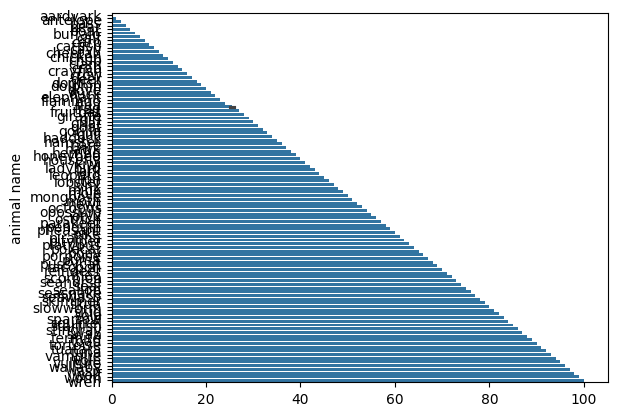

In [106]:
sns.barplot(data['animal name'])

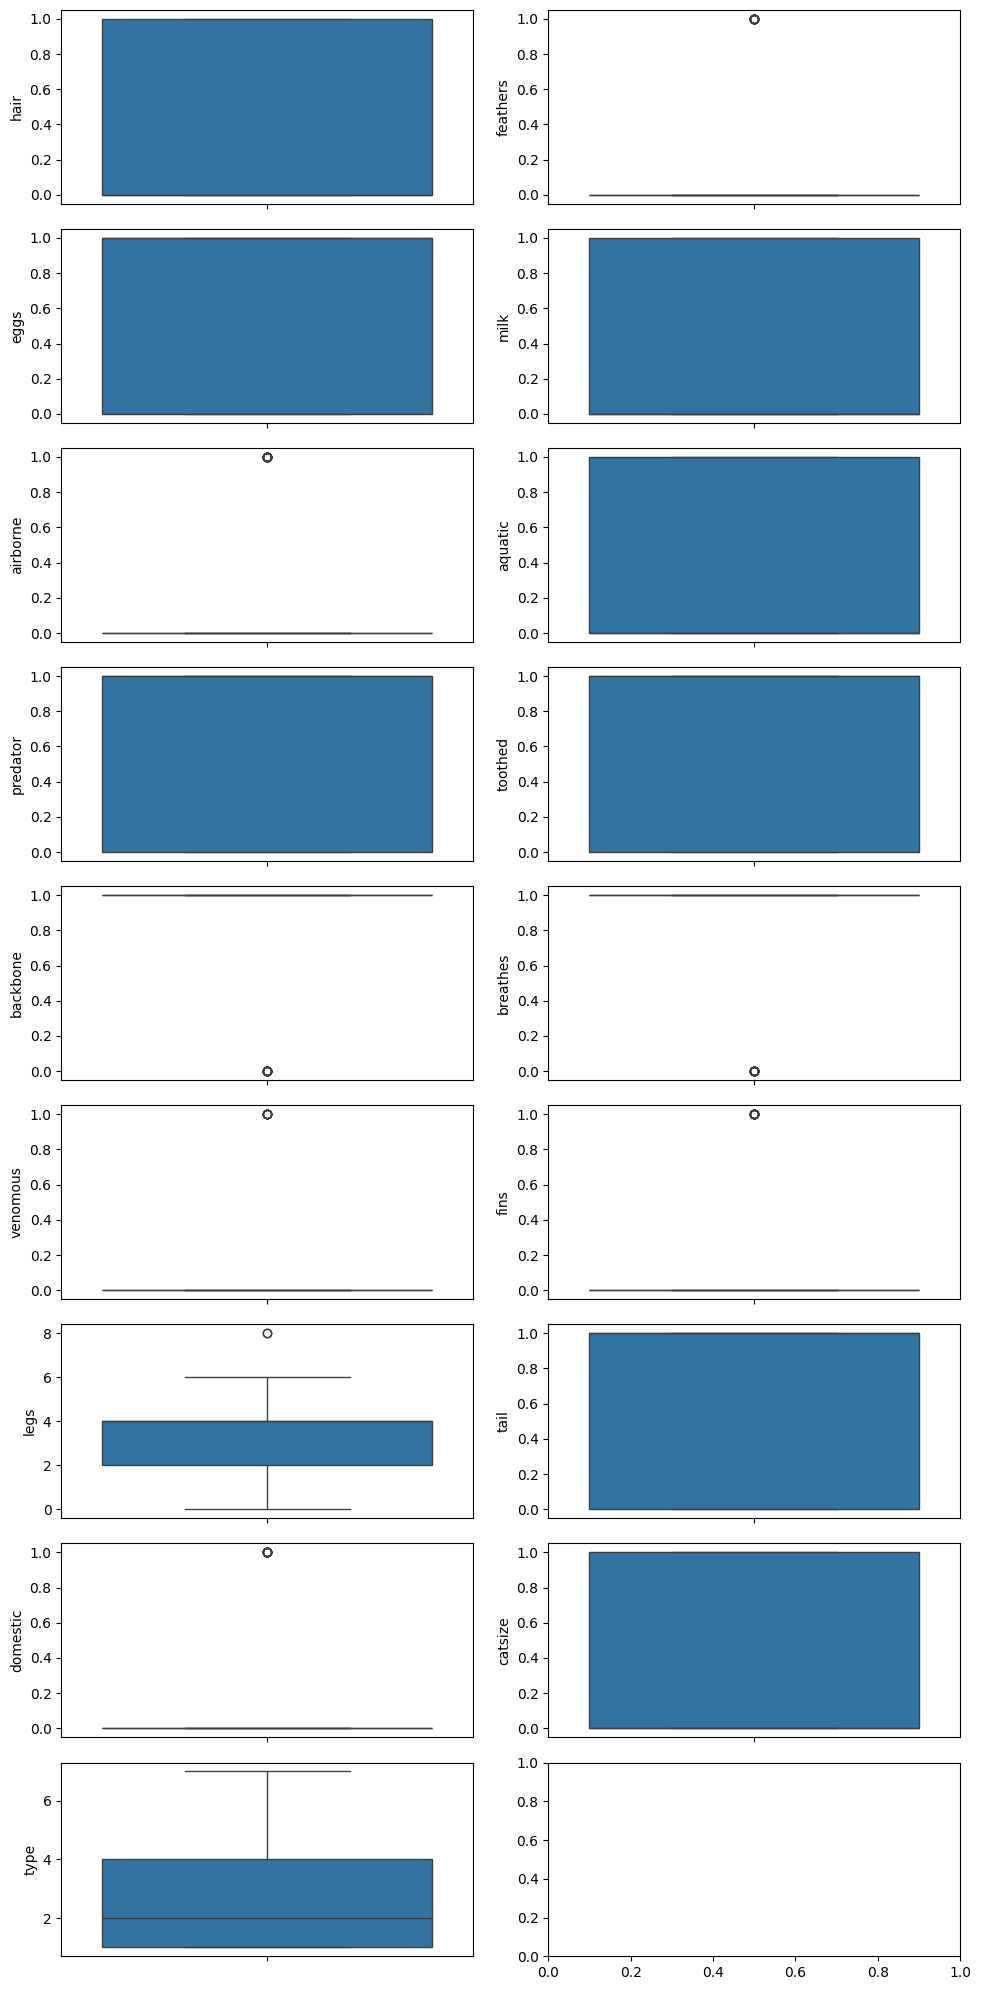

In [107]:
# PLOTTING BOXPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(9, 2, figsize=(10, 20))

sns.boxplot(data['hair'], ax = ax[0,0])
sns.boxplot(data['feathers'], ax = ax[0,1])
sns.boxplot(data['eggs'], ax = ax[1,0])
sns.boxplot(data['milk'], ax = ax[1,1])
sns.boxplot(data['airborne'], ax = ax[2,0])
sns.boxplot(data['aquatic'], ax = ax[2,1])
sns.boxplot(data['predator'], ax = ax[3,0])
sns.boxplot(data['toothed'], ax = ax[3,1])
sns.boxplot(data['backbone'], ax = ax[4,0])
sns.boxplot(data['breathes'], ax = ax[4,1])
sns.boxplot(data['venomous'], ax = ax[5,0])
sns.boxplot(data['fins'], ax = ax[5,1])
sns.boxplot(data['legs'], ax = ax[6,0])
sns.boxplot(data['tail'], ax = ax[6,1])
sns.boxplot(data['domestic'], ax = ax[7,0])
sns.boxplot(data['catsize'], ax = ax[7,1])
sns.boxplot(data['type'], ax = ax[8,0])


plt.tight_layout()

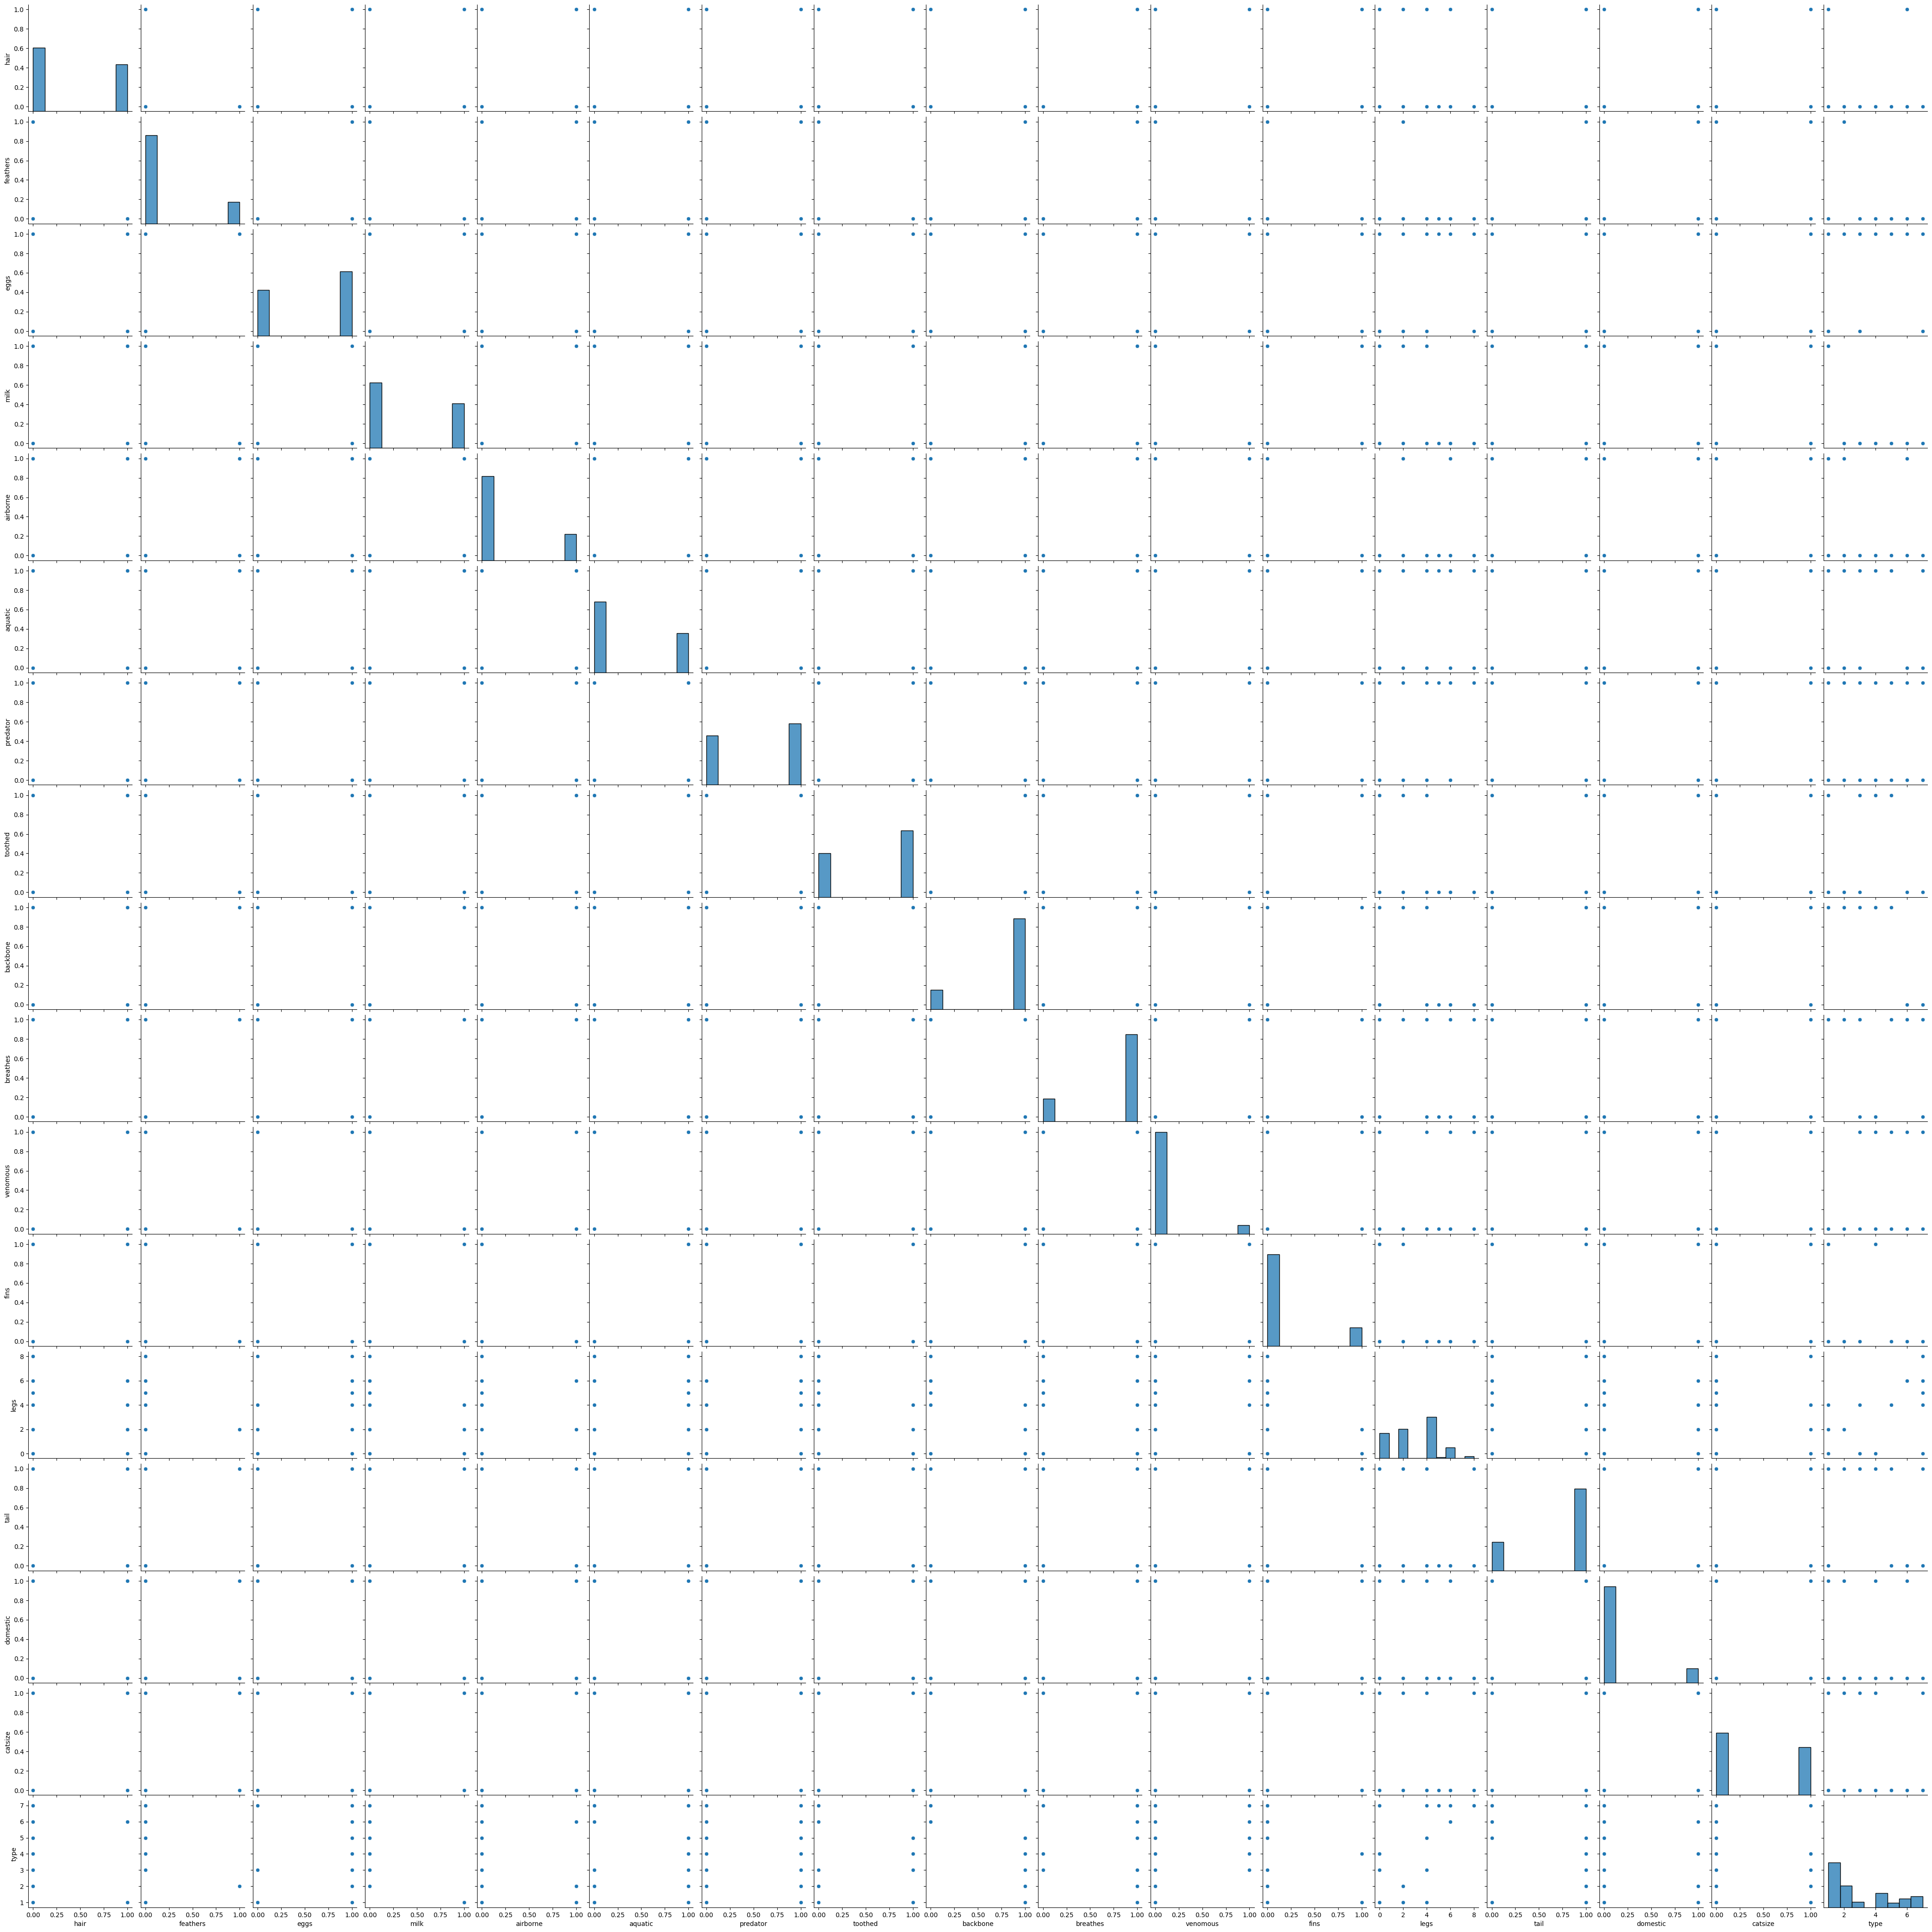

In [108]:
sns.pairplot(data)

In [110]:
a=data['animal name'].astype('category')

In [111]:
a

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']

**SPLITTING INTO X & Y**

In [112]:
X = data.iloc[:, 1:17]
Y = data.iloc[:, -1]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
scale=StandardScaler()                 #SCALING THE DATA
scaled_data=scale.fit_transform(X)
scaled_data

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [114]:
X=scaled_data

In [115]:
#SPLITTING DATA INTO TRAINING AND TESTING DATASET
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [116]:
len(X_train)

80

In [117]:
len(X_test)

21

**APPLY LINER REGRESSION**

In [118]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()

In [119]:
clf.fit(X_train,Y_train)

LinearRegression()

In [120]:
clf.predict(X_test)

array([4.35282841, 0.49311266, 1.62401112, 6.863541  , 4.0028241 ,
       1.91493093, 5.91809475, 0.91680792, 5.94299177, 4.37411379,
       1.12044113, 0.91680792, 0.91680792, 1.03264241, 3.57486024,
       0.97382492, 2.31344704, 2.25965109, 1.21270492, 1.03264241,
       4.46526057])

In [121]:
Y_test

80    3
75    1
63    1
15    7
38    4
11    2
40    6
45    1
39    6
62    3
84    1
4     1
47    1
27    1
76    3
17    1
87    2
33    2
9     1
93    1
72    7
Name: type, dtype: int64

In [122]:
clf.score(X_test,Y_test)  #ACCURACY

0.8746063977486187

**APPLYING KNN MODEL**

In [124]:
import numpy                                      # HEPERPARAMETER= n_neighbors
n_neighbors = numpy.array(range(1,101))           # WE HAVE DIFFERENT VALUE OF K IN BELOW DICTIONARY
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100])}

In [125]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
pred = KNN.predict(X_test)
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [126]:
print(grid.best_score_)   # HERE WE CAN SEE THAT WITH NUMBER 1 TESTING ARE GETTING 95% ACCURACY
print(grid.best_params_)

0.9504761904761905
{'n_neighbors': 1}


In [127]:
accuracy = KNN.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8095238095238095


In [128]:
kfold = KFold(n_splits=13)
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[1.         1.         1.         0.875      1.         1.
 0.875      0.875      1.         0.875      1.         0.85714286
 1.        ]
0.9505494505494506


In [129]:
data.shape

(101, 18)

VISUALIZING THE CV RESULTS

In [130]:
k_range = range(1,25)
k_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

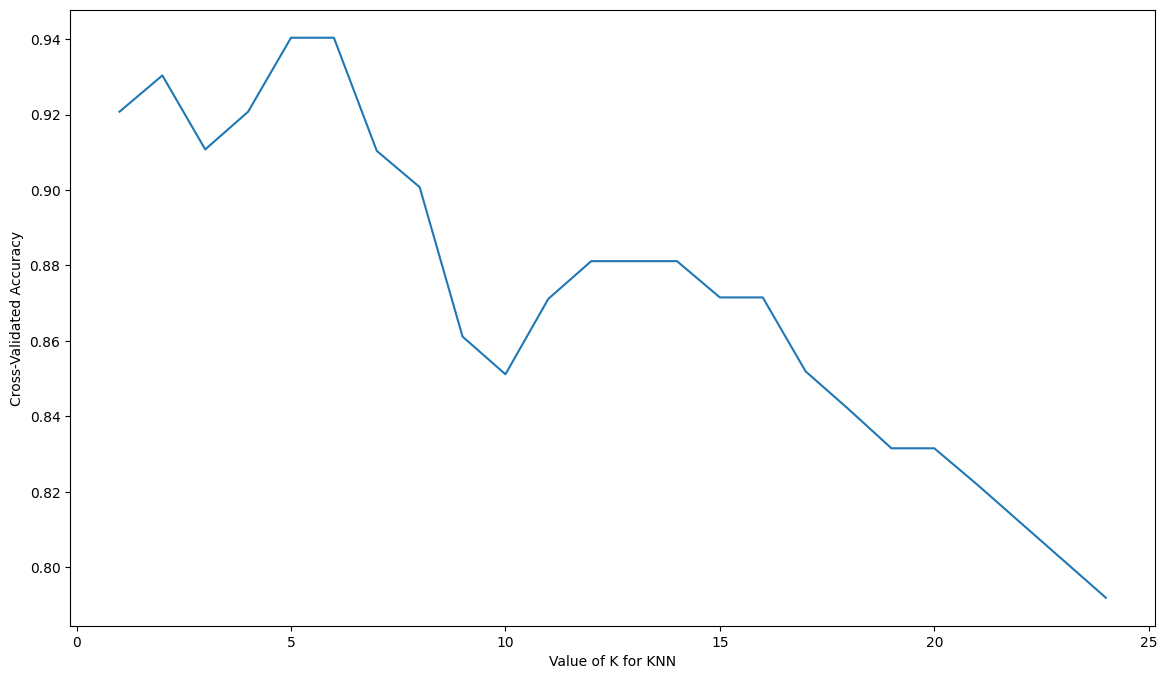

In [131]:
plt.figure(figsize=(14,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [132]:
k_scores

[0.9207692307692308,
 0.9303846153846154,
 0.9107692307692308,
 0.9207692307692308,
 0.9403846153846154,
 0.9403846153846154,
 0.9103846153846153,
 0.9007692307692308,
 0.8611538461538462,
 0.8511538461538461,
 0.8711538461538462,
 0.8811538461538461,
 0.8811538461538461,
 0.8811538461538461,
 0.8715384615384615,
 0.8715384615384615,
 0.8519230769230769,
 0.841923076923077,
 0.8315384615384616,
 0.8315384615384616,
 0.821923076923077,
 0.811923076923077,
 0.801923076923077,
 0.791923076923077]

In [133]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,25),
                            'Accuracy' : k_scores})
zoo_accuracy

,Value of k,Accuracy
0,1,0.920769
1,2,0.930385
2,3,0.910769
3,4,0.920769
4,5,0.940385
5,6,0.940385
6,7,0.910385
7,8,0.900769
8,9,0.861154
9,10,0.851154
